# Google Play Store Analysis

#### Dataset: This dataset is taken from kaggle. 
https://www.kaggle.com/lava18/google-play-store-apps 

### Code Implementation

In [1]:
#Importing libraries and Loading Dataset
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data=pd.read_csv('googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
#Shape of dataframe(rows,cols)
data.shape

(10841, 13)

In [3]:
#Information of dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Pre-Processing

In [4]:
#Finding Null Values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

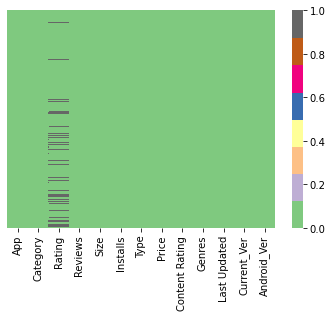

In [6]:
sns.heatmap(data.isnull(), yticklabels = False,  cmap="Accent")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3436F09D0>]],
      dtype=object)

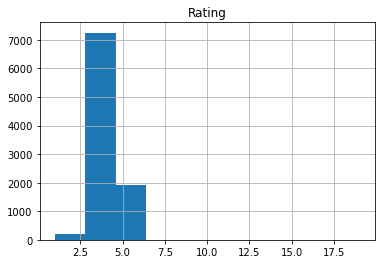

In [6]:
data.hist()

In [7]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### Here, we have one outlier with Rating>5. So, we are dropping that row.

In [8]:
data=data.drop([10472])
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##### Imputing Null Values with Mode for Categorical Variable and Median for Continuous Variable.

In [9]:
data['Type'].mode()

0    Free
dtype: object

In [10]:
data['Type']=data['Type'].fillna(data['Type'].mode().values[0])

In [11]:
data['Android_Ver'].mode()

0    4.1 and up
dtype: object

In [12]:
data['Android_Ver']=data['Android_Ver'].fillna(data['Android_Ver'].mode().values[0])

In [13]:
data['Current_Ver'].mode()

0    Varies with device
dtype: object

In [14]:
data['Current_Ver']=data['Current_Ver'].fillna(data['Current_Ver'].mode().values[0])

In [15]:
data['Rating'].median()

4.3

In [16]:
data['Rating']=data['Rating'].fillna(data['Rating'].median())

In [17]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [18]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


##### Converting Variable from Object type to Integer type.

In [19]:
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))

data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: int(x))

data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))

data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current_Ver     10840 non-null  object 
 12  Android_Ver     10840 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [21]:
#Correlation between variables.
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063166,0.066037,0.045496,-0.019318
Reviews,0.063166,1.000000,0.238215,0.643122,-0.009667
Size,0.066037,0.238215,1.000000,0.164787,-0.023006
Installs,0.045496,0.643122,0.164787,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.023006,-0.011689,1.000000


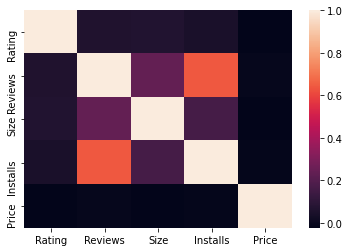

In [22]:
#Plotting correlation matrix
import seaborn as sns
sns.heatmap(data.corr(), annot=False)

In [23]:
#Splitting Last Updated into Month and Year.
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['year']=data['Last Updated'].dt.year
data['month']=data['Last Updated'].dt.month

In [24]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current_Ver,Android_Ver,year,month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1,4.1 and up,2018,7
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1,2.2 and up,2017,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,1


### Exploratory Data Analysis(EDA)

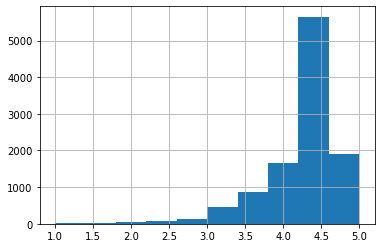

In [25]:
data['Rating'].hist()

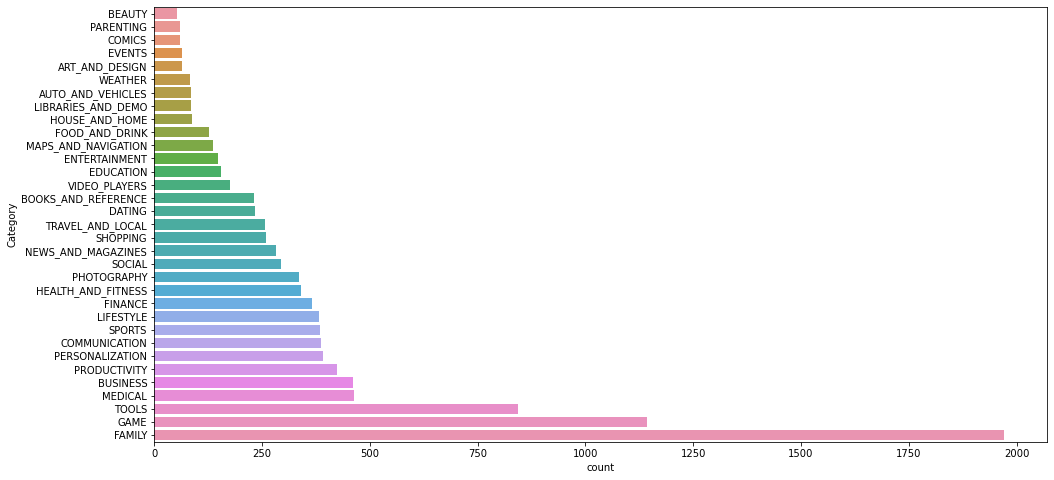

In [26]:
#Displaying all categories.
plt.figure(figsize=(16,8))
sns.countplot(y='Category', data=data, order = data['Category'].value_counts().sort_values().index)

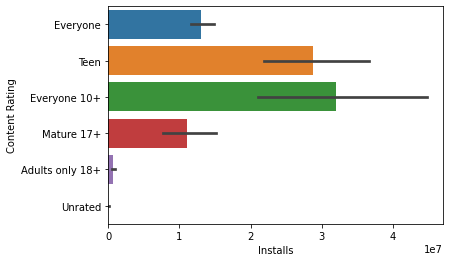

In [27]:
#Displaying all content ratings.
sns.barplot(x='Installs',y='Content Rating', data=data)

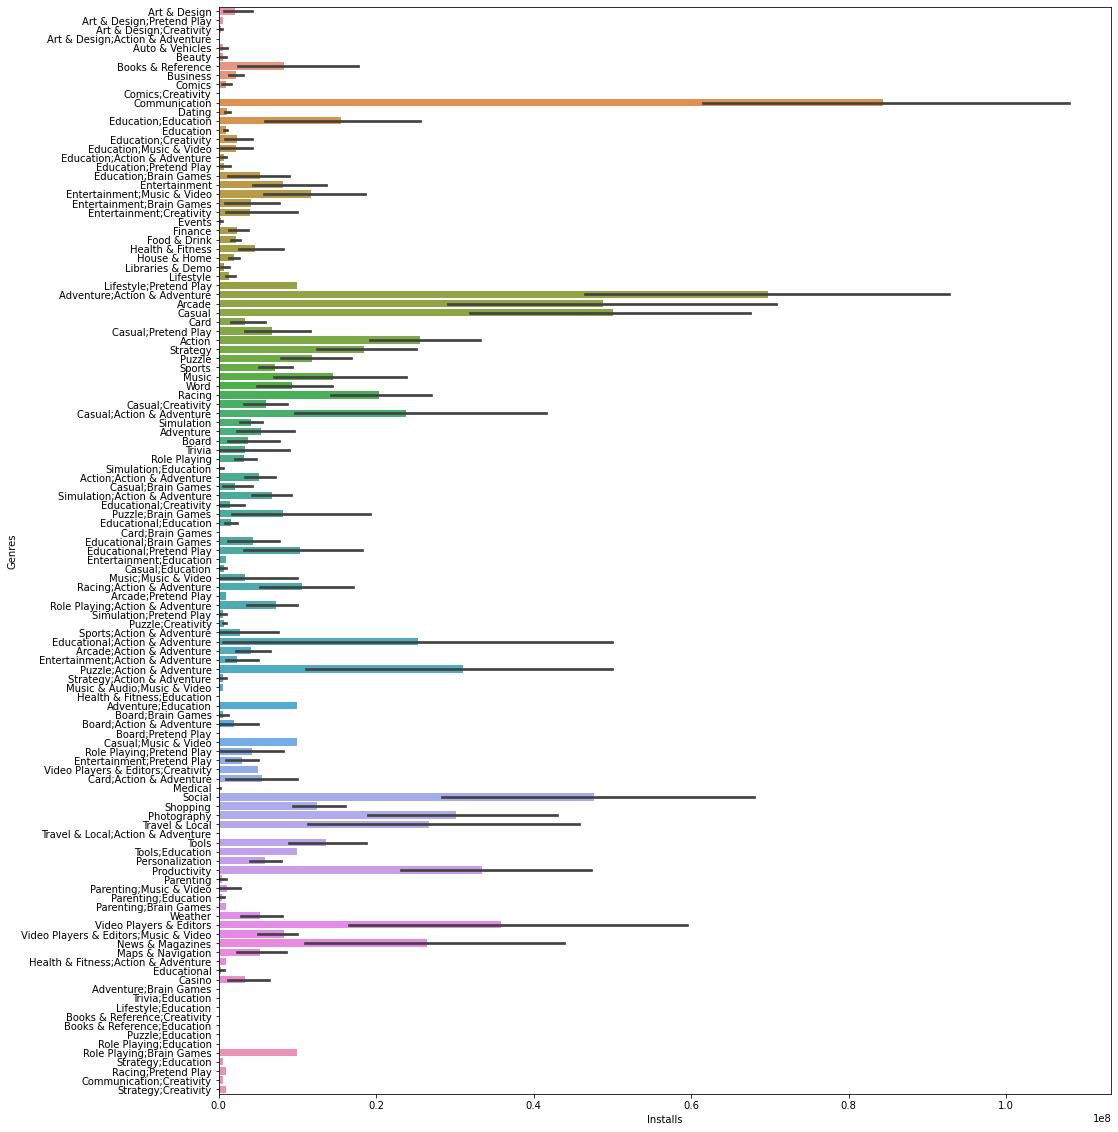

In [28]:
plt.figure(figsize=(16,20))
sns.barplot(x="Installs", y="Genres", data=data)

#### Dummy Variables

In [29]:
category=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)
content_rating=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
frames=[data,category,content_rating]
data=pd.concat(frames,axis=1)
data=data.drop(['Category','Content Rating'],axis=1)

In [30]:
#Dropping unneccesary columns
data=data.drop(['App','Size','Installs','Price','Genres','Last Updated','Current_Ver','Android_Ver'],axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    10840 non-null  float64
 1   Reviews                   10840 non-null  int64  
 2   Type                      10840 non-null  object 
 3   year                      10840 non-null  int64  
 4   month                     10840 non-null  int64  
 5   catg_AUTO_AND_VEHICLES    10840 non-null  uint8  
 6   catg_BEAUTY               10840 non-null  uint8  
 7   catg_BOOKS_AND_REFERENCE  10840 non-null  uint8  
 8   catg_BUSINESS             10840 non-null  uint8  
 9   catg_COMICS               10840 non-null  uint8  
 10  catg_COMMUNICATION        10840 non-null  uint8  
 11  catg_DATING               10840 non-null  uint8  
 12  catg_EDUCATION            10840 non-null  uint8  
 13  catg_ENTERTAINMENT        10840 non-null  uint8  
 14  catg_E

### Hypothesis Testing

### Test whether there is any difference in the ratings of the paid and free apps.

Null Hypothesis: No difference in ratings of free and paid apps.
Alternative Hypothesis: There is a difference between ratings of free and paid apps.

In [32]:
rt={'Rating':data['Rating'],'Type':data['Type']}
r_t=pd.DataFrame(rt)
r_t

,Rating,Type
0,4.1,Free
1,3.9,Free
2,4.7,Free
3,4.5,Free
4,4.3,Free
...,...,...
10836,4.5,Free
10837,5.0,Free
10838,4.3,Free
10839,4.5,Free


##### Ratings of Free Apps

In [33]:
free=r_t['Rating'] [r_t['Type']=='Free']
free

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10040, dtype: float64

##### Ratings of Paid Apps

In [34]:
paid=r_t['Rating'] [r_t['Type']=='Paid']
paid

234      4.7
235      4.8
290      4.7
291      4.8
427      4.0
        ... 
10735    4.3
10760    4.4
10782    3.8
10785    4.2
10798    4.3
Name: Rating, Length: 800, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A34416E4F0>,
      dtype=object)

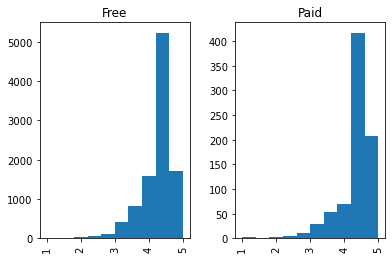

In [35]:
r_t.hist(by='Type')

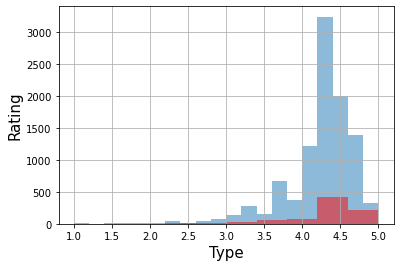

In [36]:
import seaborn as sns
free.hist(histtype='stepfilled', alpha=.5, bins=20) 
paid.hist(histtype='stepfilled', alpha=.5, color='red', bins=10)
plt.xlabel('Type',fontsize=15)
plt.ylabel('Rating',fontsize=15)
plt.show()

In [37]:
means_table = r_t.groupby('Type').mean()
means_table

,Rating
Type,
Free,4.201175
Paid,4.273000


In [38]:
observed_difference=means_table['Rating'][1]-means_table['Rating'][0]

In [39]:
shuffled=r_t.sample(10840,replace = False)
shuffled

,Rating,Type
5657,4.0,Free
3177,4.4,Free
2618,4.3,Free
4263,4.1,Free
4589,4.6,Free
...,...,...
7650,4.2,Free
3482,4.6,Free
5601,4.2,Free
9386,3.7,Free


In [40]:
shuffled_rates=shuffled['Rating']

In [41]:
original_and_shuffled=r_t.assign(shuffled_rates=shuffled_rates.values )
original_and_shuffled

,Rating,Type,shuffled_rates
0,4.1,Free,4.0
1,3.9,Free,4.4
2,4.7,Free,4.3
3,4.5,Free,4.1
4,4.3,Free,4.6
...,...,...,...
10836,4.5,Free,4.2
10837,5.0,Free,4.6
10838,4.3,Free,4.2
10839,4.5,Free,3.7


In [42]:
all_group_means=original_and_shuffled.groupby('Type').mean()
all_group_means

,Rating,shuffled_rates
Type,,
Free,4.201175,4.209024
Paid,4.273000,4.174500


In [43]:
difference=all_group_means['shuffled_rates'][1]-all_group_means['shuffled_rates'][0]
difference

-0.03452390438248365

##### One Simulation

In [44]:
rt={'Rating':data['Rating'],'Type':data['Type']}
r_t=pd.DataFrame(rt)
shuffled = r_t.sample(10840,replace = False)
shuffled_rates = shuffled['Rating']
original_and_shuffled = r_t.assign(shuffled_rates=shuffled_rates.values )
all_group_means= original_and_shuffled.groupby('Type').mean()
difference = all_group_means['shuffled_rates'][0]- all_group_means['shuffled_rates'][1]
difference

-0.002860059760940281

##### 5000 Simulations

In [45]:
import numpy as np
differences = np.zeros(5000)
for i in np.arange(5000):
    rt={'Rating':data['Rating'],'Type':data['Type']}
r_t=pd.DataFrame(rt)
shuffled = r_t.sample(10840,replace = False)
shuffled_rates = shuffled['Rating']
original_and_shuffled = r_t.assign(shuffled_rates=shuffled_rates.values )
all_group_means= original_and_shuffled.groupby('Type').mean()
difference = all_group_means['shuffled_rates'][0]- all_group_means['shuffled_rates'][1]
differences[i]=difference

In [46]:
differences

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , -0.00866335])

In [47]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4995,0.000000
4996,0.000000
4997,0.000000
4998,0.000000


In [48]:
p_value=np.count_nonzero(differences <= observed_difference)/differences.size
p_value

1.0

In [49]:
if (p_value < 0.05):   
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


### T-Test

In [50]:
rating=data['Rating']
rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [51]:
len(rating)

10840

In [52]:
rating_mean=np.mean(rating)
print(rating_mean)

4.206476014760287


In [53]:
sample_size=30
rates_sample=np.random.choice(rating,sample_size)
rates_sample

array([4.6, 4.4, 4.4, 4.4, 4.3, 4.4, 4.3, 4.8, 4.3, 4.6, 4.3, 3. , 4.3,
       4.3, 3.5, 4.3, 4.2, 3.9, 4.3, 4.3, 4.2, 4.3, 3.9, 4.4, 4.6, 4.6,
       4.2, 4.9, 4. , 5. ])

In [54]:
from scipy.stats import ttest_1samp

In [55]:
ttest,p_value=ttest_1samp(rates_sample,30)

In [56]:
print(p_value)

1.0358516634699048e-54


In [57]:
if (p_value < 0.05):   
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


#### Considering my Target Variable is "Type" which is of Categorical values(Free and Paid).

In [58]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data.Type=l.fit_transform(data.Type)

#### Splitting data into Training and Test Set

In [59]:
X=data.drop('Type',axis=1)
y=data['Type']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [61]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#### As our target variable is categorical type, we can use any classification problem.

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
#Accuracy
lr_ac=f'{accuracy_score(y_test, lr_pred)*100:.2f}%'
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 92.65%


LogisticRegression_ConfusionMatrix:
 [[3008    8]
 [ 231    5]]


Text(0.5, 1.0, 'Confusion Matrix of LR')

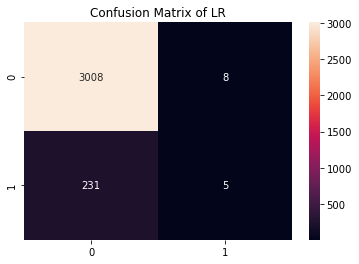

In [63]:
#Confusion Matrix
lr_cm=confusion_matrix(y_test,lr_pred)
print('LogisticRegression_ConfusionMatrix:\n',lr_cm)
sns.heatmap(lr_cm,annot = True, fmt = "d")
plt.title('Confusion Matrix of LR')

In [64]:
#Classification Report of model(F-Measure,Recall,Precision)
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3016
           1       0.38      0.02      0.04       236

    accuracy                           0.93      3252
   macro avg       0.66      0.51      0.50      3252
weighted avg       0.89      0.93      0.89      3252



In [65]:
# 10 folds Cross-Validation
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(lr, X, y, cv=10)
scores_lr

array([0.92619926, 0.92619926, 0.92619926, 0.92619926, 0.92619926,
       0.92619926, 0.92619926, 0.92619926, 0.92619926, 0.92619926])

In [66]:
scores_lr.mean()

0.9261992619926198

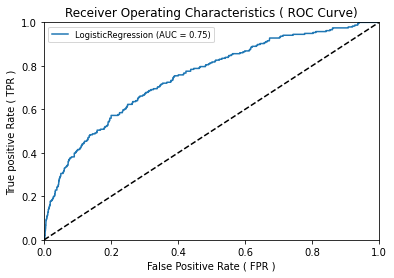

In [67]:
#ROC Test
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristics ( ROC Curve)')
plt.xlabel('False Positive Rate ( FPR )')
plt.ylabel('True positive Rate ( TPR )')
plt.legend(loc=0,fontsize='small')
plt.show()

### Decision Tree

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
#Accuracy
dt_ac=f'{accuracy_score(y_test, dt_pred)*100:.2f}%'
print('Decision Tree Accuracy:',dt_ac)

Decision Tree Accuracy: 89.88%


DecisionTree_ConfusionMatrix:
 [[2846  170]
 [ 159   77]]


Text(0.5, 1.0, 'Confusion Matrix of DT')

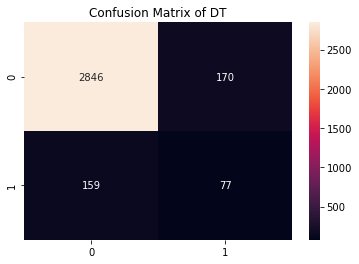

In [69]:
#Confusion Matrix
dt_cm=confusion_matrix(y_test,dt_pred)
print('DecisionTree_ConfusionMatrix:\n',dt_cm)
sns.heatmap(dt_cm,annot = True, fmt = "d")
plt.title('Confusion Matrix of DT')

In [70]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3016
           1       0.31      0.33      0.32       236

    accuracy                           0.90      3252
   macro avg       0.63      0.63      0.63      3252
weighted avg       0.90      0.90      0.90      3252



In [71]:
# 10 folds cross validation
from sklearn.model_selection import cross_val_score
scores_dt=cross_val_score(dt, X, y, cv=10)
scores_dt

array([0.91236162, 0.90774908, 0.87822878, 0.88284133, 0.86346863,
       0.86346863, 0.86254613, 0.85239852, 0.86531365, 0.88099631])

In [72]:
scores_dt.mean()

0.8769372693726938

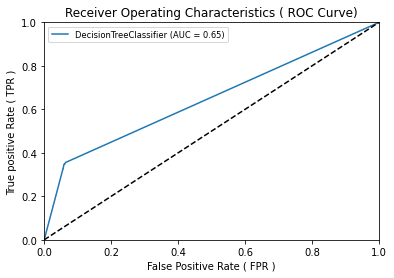

In [73]:
#ROC Test
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristics ( ROC Curve)')
plt.xlabel('False Positive Rate ( FPR )')
plt.ylabel('True positive Rate ( TPR )')
plt.legend(loc=0,fontsize='small')
plt.show()

### SVM

In [74]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)
#Accuracy
svm_ac=f'{accuracy_score(y_test, svm_pred)*100:.2f}%'
print('SVM_Accuracy:',svm_ac)

SVM_Accuracy: 92.74%


SVM_ConfusionMatrix:
 [[3016    0]
 [ 236    0]]


Text(0.5, 1.0, 'Confusion Matrix of SVM')

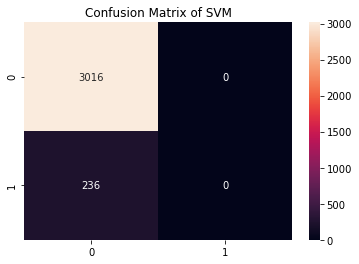

In [75]:
#ConfusionMatrix
svm_cm=confusion_matrix(y_test,svm_pred)
print('SVM_ConfusionMatrix:\n',svm_cm)
sns.heatmap(svm_cm,annot = True, fmt = "d")
plt.title('Confusion Matrix of SVM')

In [76]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3016
           1       0.00      0.00      0.00       236

    accuracy                           0.93      3252
   macro avg       0.46      0.50      0.48      3252
weighted avg       0.86      0.93      0.89      3252



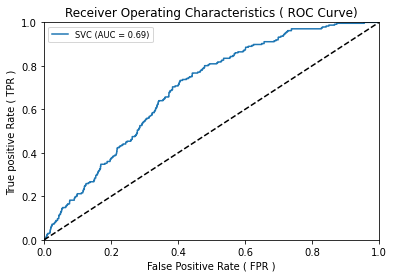

In [77]:
#ROC Test
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm,X_test,y_test)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Receiver Operating Characteristics ( ROC Curve)')
plt.xlabel('False Positive Rate ( FPR )')
plt.ylabel('True positive Rate ( TPR )')
plt.legend(loc=0,fontsize='small')
plt.show()

In [78]:
models={'Accuracy':[lr_ac,dt_ac,svm_ac],
        'Model':['Logistic Regression','DecisionTree Classifier','SVC']}
models_acc=pd.DataFrame(models)
models_acc

,Accuracy,Model
0,92.65%,Logistic Regression
1,89.88%,DecisionTree Classifier
2,92.74%,SVC
